In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

In [2]:
#Load in data
data = pd.read_csv('data/train.csv')

In [3]:
pd.set_option('display.max_columns', 500)
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [5]:
#reindex with PetID
data.index = data['PetID']
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
# Drop 'Name' & 'RescuerID' columns
data.drop(columns = ['Name', 'RescuerID'], inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Age            14993 non-null  int64  
 2   Breed1         14993 non-null  int64  
 3   Breed2         14993 non-null  int64  
 4   Gender         14993 non-null  int64  
 5   Color1         14993 non-null  int64  
 6   Color2         14993 non-null  int64  
 7   Color3         14993 non-null  int64  
 8   MaturitySize   14993 non-null  int64  
 9   FurLength      14993 non-null  int64  
 10  Vaccinated     14993 non-null  int64  
 11  Dewormed       14993 non-null  int64  
 12  Sterilized     14993 non-null  int64  
 13  Health         14993 non-null  int64  
 14  Quantity       14993 non-null  int64  
 15  Fee            14993 non-null  int64  
 16  State          14993 non-null  int64  
 17  VideoAmt       14993 non-null  int64  
 18 

In [8]:
data['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

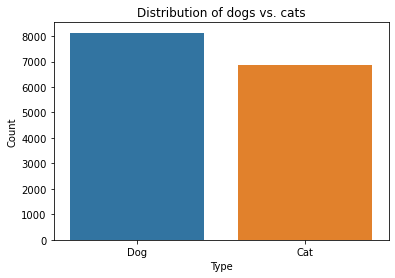

In [9]:
typeData = data.groupby(['Type']).count().reset_index()
typeData
ax = sns.barplot(x = 'Type', y = 'PetID', data=typeData)
plt.xticks(np.arange(0,2), ["Dog", "Cat"])
plt.ylabel('Count')
plt.title('Distribution of dogs vs. cats')
plt.show()

Let's split the data into two datasets: Dog and cat.

In [10]:
dogData = data[data.Type == 1].drop(columns = 'Type')
catData = data[data.Type == 2].drop(columns = 'Type')

In [11]:
dogData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8132 entries, 3422e4906 to a83d95ead
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            8132 non-null   int64  
 1   Breed1         8132 non-null   int64  
 2   Breed2         8132 non-null   int64  
 3   Gender         8132 non-null   int64  
 4   Color1         8132 non-null   int64  
 5   Color2         8132 non-null   int64  
 6   Color3         8132 non-null   int64  
 7   MaturitySize   8132 non-null   int64  
 8   FurLength      8132 non-null   int64  
 9   Vaccinated     8132 non-null   int64  
 10  Dewormed       8132 non-null   int64  
 11  Sterilized     8132 non-null   int64  
 12  Health         8132 non-null   int64  
 13  Quantity       8132 non-null   int64  
 14  Fee            8132 non-null   int64  
 15  State          8132 non-null   int64  
 16  VideoAmt       8132 non-null   int64  
 17  Description    8129 non-null   object 
 18  

In [12]:
catData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6861 entries, 86e1089a3 to e4da1c9e4
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            6861 non-null   int64  
 1   Breed1         6861 non-null   int64  
 2   Breed2         6861 non-null   int64  
 3   Gender         6861 non-null   int64  
 4   Color1         6861 non-null   int64  
 5   Color2         6861 non-null   int64  
 6   Color3         6861 non-null   int64  
 7   MaturitySize   6861 non-null   int64  
 8   FurLength      6861 non-null   int64  
 9   Vaccinated     6861 non-null   int64  
 10  Dewormed       6861 non-null   int64  
 11  Sterilized     6861 non-null   int64  
 12  Health         6861 non-null   int64  
 13  Quantity       6861 non-null   int64  
 14  Fee            6861 non-null   int64  
 15  State          6861 non-null   int64  
 16  VideoAmt       6861 non-null   int64  
 17  Description    6852 non-null   object 
 18  

### Dog data analysis

In [13]:
dogData.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
5842f1ff5,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
850a43f90,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
97aa9eeac,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8b693ca84,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1


In [14]:
dogData.Age.describe()

count    8132.000000
mean       12.906173
std        21.377588
min         0.000000
25%         2.000000
50%         3.000000
75%        12.000000
max       255.000000
Name: Age, dtype: float64

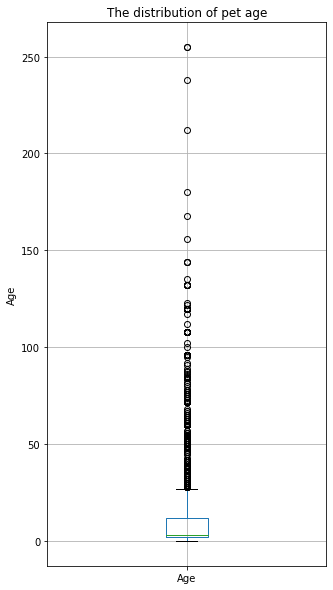

In [15]:
plt.figure(figsize = (5, 10))
dogData[['Age']].boxplot()
plt.ylabel('Age')
plt.title('The distribution of pet age')
plt.show()

75% of pets are between ages 0-12 months.  The distribution is highly right skewed. Let's remove outliers 3 stds below & above the mean.

In [16]:
z_scores = stats.zscore(dogData.Age)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dogData = dogData[filtered_entries]

In [17]:
dogData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7922 entries, 3422e4906 to a83d95ead
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7922 non-null   int64  
 1   Breed1         7922 non-null   int64  
 2   Breed2         7922 non-null   int64  
 3   Gender         7922 non-null   int64  
 4   Color1         7922 non-null   int64  
 5   Color2         7922 non-null   int64  
 6   Color3         7922 non-null   int64  
 7   MaturitySize   7922 non-null   int64  
 8   FurLength      7922 non-null   int64  
 9   Vaccinated     7922 non-null   int64  
 10  Dewormed       7922 non-null   int64  
 11  Sterilized     7922 non-null   int64  
 12  Health         7922 non-null   int64  
 13  Quantity       7922 non-null   int64  
 14  Fee            7922 non-null   int64  
 15  State          7922 non-null   int64  
 16  VideoAmt       7922 non-null   int64  
 17  Description    7919 non-null   object 
 18  

210 records were removed. 

In [18]:
dogData['Breed1'].value_counts() #We notice a large proportion of breed 307 (mixed breed)

307    5881
141     191
205     161
179     157
218     157
       ... 
85        1
81        1
143       1
123       1
25        1
Name: Breed1, Length: 112, dtype: int64

In [19]:
dogData[dogData['Breed1'] == 0] 

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
375905770,2,0,26,2,2,0,0,2,1,1,1,2,1,1,0,41326,0,Milo went missing after a week with her new ad...,375905770,3.0,3
da8d4a273,4,0,307,2,2,3,0,2,1,1,1,2,1,1,100,41326,0,"She's only 4 months old, very friendly and lov...",da8d4a273,5.0,4
7b5bee232,72,0,307,1,1,2,0,2,2,2,2,2,1,1,0,41326,0,He is a stray dog found wandering around Unive...,7b5bee232,5.0,4
0327b8e94,2,0,205,2,2,5,7,1,1,2,2,2,1,1,1,41336,0,I want to adopt a newborn puppy Prefer small b...,0327b8e94,0.0,3


In [20]:
#There appears to be some breeds mistakenly filled into Breed2 instead of Breed1, let's fix this.
dogData.Breed1 = np.where((dogData['Breed1']==0) & (dogData['Breed2']!=0), dogData['Breed2'], dogData['Breed1']) #If breed1 = 0 but not breed2, set breed1 to breed2 and breed2 to 0
dogData.Breed2 = np.where((dogData['Breed1']== dogData['Breed2']), 0, dogData['Breed2'])  #If breed1 = breed2, set breed2 to 0

In [21]:
dogData[(dogData.Breed1 == 307) & (dogData.Breed2 != 0)]

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
1bf24d8be,10,307,117,2,1,2,7,2,2,1,1,1,1,1,0,41326,0,Donut is a friendly doggie and very domesticat...,1bf24d8be,0.0,4
6fecc5cf7,1,307,141,2,1,0,0,2,2,2,1,1,1,2,0,41326,0,2 adorable female black pups rescued from USJ ...,6fecc5cf7,13.0,3
815f4cc08,3,307,141,1,5,0,0,2,2,3,3,2,1,1,0,41326,0,Lovely puppy with good nature looking for a ho...,815f4cc08,3.0,3
8df0bb3b3,2,307,76,1,1,7,0,2,1,1,1,2,1,1,0,41326,4,"Mochi, momo and Molly are siblings, about 3 mo...",8df0bb3b3,18.0,3
6d9b202c9,4,307,36,2,1,2,7,2,2,1,1,1,1,1,0,41326,0,She was found wandering around a playground of...,6d9b202c9,10.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1f58a286e,1,307,189,2,1,3,0,2,2,3,3,3,1,1,0,41326,0,Found it beside road under a big tree alone an...,1f58a286e,1.0,1
94e45a1a7,2,307,109,2,2,0,0,2,2,1,1,2,1,2,0,41327,0,"cute,fat,active^^ One male and one female",94e45a1a7,0.0,0
5bbf44cea,24,307,152,2,1,2,0,2,1,1,1,1,1,1,0,41327,0,Previously always stay together with a male do...,5bbf44cea,2.0,4


In [22]:
#If Breed1 == 307 and Breed2 != 0, swap the values so that Breed1 contains a known breed
tempBreed1 = np.where((dogData['Breed1'] == 307) & (dogData['Breed2'] != 0), dogData['Breed2'], dogData['Breed1'])
dogData.Breed2 = np.where((dogData['Breed1'] == 307) & (dogData['Breed2'] != 0), 307, dogData['Breed2'])
dogData.Breed1 = tempBreed1

In [23]:
#Create new predictor variable: pureBreed
dogData['PureBreed'] = np.where((dogData.Breed2 == 0) & (dogData.Breed1 != 307), 1, 0)

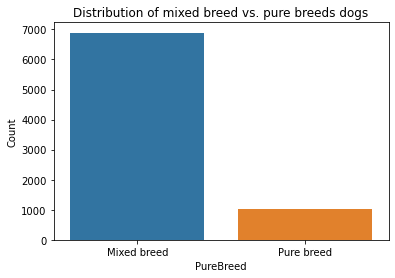

In [24]:
ax = sns.barplot(x = 'PureBreed', y = 'PetID', data=dogData.groupby(['PureBreed']).count().reset_index())
plt.xticks(np.arange(0,2), ["Mixed breed", "Pure breed"])
plt.ylabel('Count')
plt.title('Distribution of mixed breed vs. pure breeds dogs')
plt.show()

In [25]:
breedCounts = dogData.Breed1.value_counts(normalize = True).to_frame()

In [26]:
breedCounts.head(15)

,Breed1
307,0.694143
141,0.031431
218,0.026635
205,0.020449
179,0.020197
109,0.019566
103,0.016536
213,0.014264
189,0.013759
20,0.010982


Let's only keep the top 10 most prominent breeds and group the rest of the breeds as others: 999.

In [27]:
top10Breeds = list(breedCounts.index[:10])
dogData.Breed1 = np.where((dogData['Breed1'].isin(top10Breeds)), dogData['Breed1'], 999) 

In [28]:
dogData.Breed1.value_counts()

307    5499
999    1046
141     249
218     211
205     162
179     160
109     155
103     131
213     113
189     109
20       87
Name: Breed1, dtype: int64

In [29]:
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(dogData.Breed1.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Breed_"+str(i) for i in sorted(dogData.Breed1.unique()) ])
dogData = pd.concat([dogData, breedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
dogData.drop(['Breed1', 'Breed2'], axis=1, inplace = True) 
dogData.head()

,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5842f1ff5,4,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
850a43f90,1,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97aa9eeac,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8b693ca84,2,1,1,2,7,2,1,2,1,2,1,1,0,41401,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
dogData.Gender.value_counts()

2    4157
1    2894
3     871
Name: Gender, dtype: int64

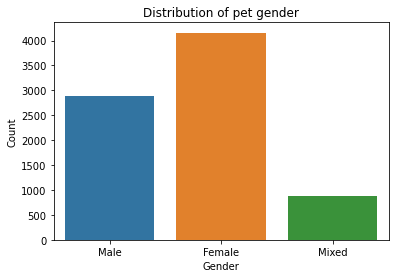

In [31]:
ax = sns.barplot(x = 'Gender', y = 'PetID', data=dogData.groupby(['Gender']).count().reset_index())
plt.xticks(np.arange(0,3), ["Male", "Female", "Mixed"])
plt.ylabel('Count')
plt.title('Distribution of pet gender')
plt.show()

In [32]:
dogData.Color1.value_counts(dropna = False)

1    3878
2    2589
5     563
7     347
3     318
4     142
6      85
Name: Color1, dtype: int64

In [33]:
dogData.Color2.value_counts()

0    2898
2    2309
7    1506
5     611
3     279
4     207
6     112
Name: Color2, dtype: int64

In [34]:
dogData.Color3.value_counts()

0    6247
7    1204
5     257
3      88
4      75
6      51
Name: Color3, dtype: int64

In [35]:
#Reshape color data to be in the format for generating a histogram
colorData = pd.melt(dogData, id_vars = 'PetID', value_vars = ['Color1', 'Color2', 'Color3'], var_name = 'ColorNumber', value_name = 'ColorID')

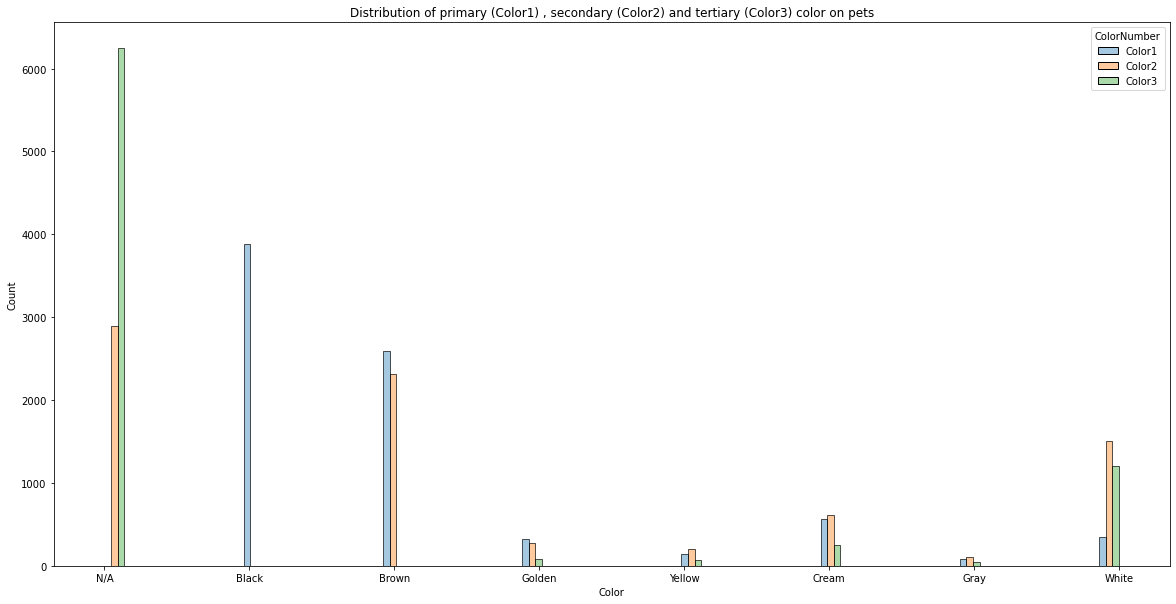

In [36]:
plt.figure(figsize = (20,10))
sns.histplot(data = colorData, x = 'ColorID', hue = 'ColorNumber', stat= 'count', alpha = 0.4, multiple = 'dodge')
plt.xticks(np.arange(0,8), ['N/A', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.xlabel('Color')
plt.title('Distribution of primary (Color1) , secondary (Color2) and tertiary (Color3) color on pets')
plt.show()

In [37]:
#Create new predictor: NumColor (1: 1 color, 2: 2 colors, 3: 3+ colors)

dogData['NumColor'] = np.where((dogData.Color3 != 0), 3, 2) #Identify pets with 3+ colors, label everything else as '2'
dogData['NumColor'] = np.where((dogData.Color2 == 0) & (dogData.NumColor == 2), 1, dogData.NumColor) #Update 2's to 1 if appropriate

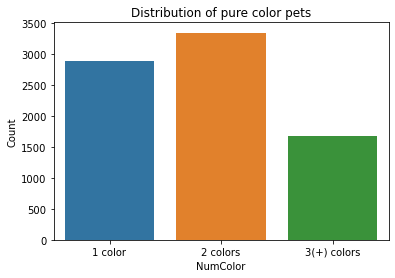

In [38]:
ax = sns.barplot(x = 'NumColor', y = 'PetID', data=dogData.groupby(['NumColor']).count().reset_index())
plt.xticks(np.arange(0,3), ["1 color", "2 colors", "3(+) colors"])
plt.ylabel('Count')
plt.title('Distribution of pure color pets')
plt.show()

Let's look at the distribution of the dominant color.

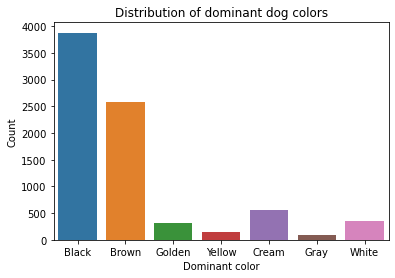

In [39]:
ax = sns.barplot(x = 'Color1', y = 'PetID', data=dogData.groupby(['Color1']).count().reset_index())
plt.xticks(np.arange(0,7), ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.ylabel('Count')
plt.xlabel('Dominant color')
plt.title('Distribution of dominant dog colors')
plt.show()

In [40]:
#One hot encode the dominant color (Color1) 
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(dogData.Color1.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Color_"+str(i) for i in sorted(dogData.Color1.unique()) ])
dogData = pd.concat([dogData, breedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
dogData.drop(['Color1', 'Color2', 'Color3'], axis=1, inplace = True) 
dogData.head()

,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,NumColor,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,2,2,1,1,2,1,1,0,41326,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5842f1ff5,4,2,2,1,1,1,2,1,1,150,41401,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
850a43f90,1,1,2,1,2,2,2,1,1,0,41326,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97aa9eeac,0,2,2,1,2,2,2,1,6,0,41326,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8b693ca84,2,1,2,1,2,1,2,1,1,0,41401,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
dogData.MaturitySize.value_counts()

2    6033
1    1151
3     718
4      20
Name: MaturitySize, dtype: int64

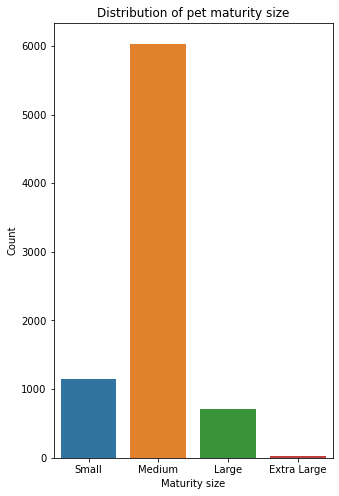

In [42]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'MaturitySize', y = 'PetID', data=dogData.groupby(['MaturitySize']).count().reset_index())
plt.xticks(np.arange(0,4), ['Small', 'Medium', 'Large', 'Extra Large'])
plt.ylabel('Count')
plt.title('Distribution of pet maturity size')
plt.xlabel('Maturity size')
plt.show()

In [43]:
# One hot encode maturity size
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(dogData.MaturitySize.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Size_"+str(i) for i in sorted(dogData.MaturitySize.unique()) ])
dogData = pd.concat([dogData, breedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'MaturitySize' column
dogData.drop(['MaturitySize'], axis=1, inplace = True) 
dogData.head()

,Age,Gender,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,NumColor,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,Size_4
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,2,1,1,2,1,1,0,41326,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5842f1ff5,4,2,1,1,1,2,1,1,150,41401,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
850a43f90,1,1,1,2,2,2,1,1,0,41326,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97aa9eeac,0,2,1,2,2,2,1,6,0,41326,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8b693ca84,2,1,1,2,1,2,1,1,0,41401,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
dogData.FurLength.value_counts()

1    4639
2    2940
3     343
Name: FurLength, dtype: int64

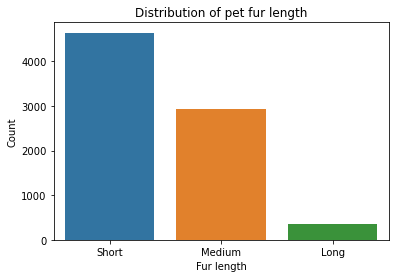

In [45]:
ax = sns.barplot(x = 'FurLength', y = 'PetID', data=dogData.groupby(['FurLength']).count().reset_index())
plt.xticks(np.arange(0,3), ['Short', 'Medium', 'Long'])
plt.ylabel('Count')
plt.title('Distribution of pet fur length')
plt.xlabel('Fur length')
plt.show()

In [46]:
dogData.Vaccinated.value_counts()

1    3758
2    3010
3    1154
Name: Vaccinated, dtype: int64

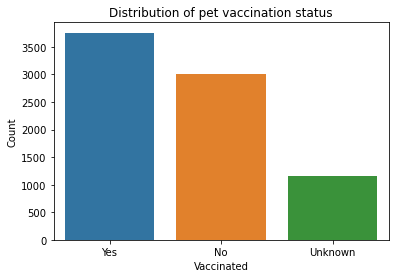

In [47]:
ax = sns.barplot(x = 'Vaccinated', y = 'PetID', data=dogData.groupby(['Vaccinated']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of pet vaccination status')
plt.xlabel('Vaccinated')
plt.show()

In [48]:
dogData.Dewormed.value_counts()

1    4733
2    2073
3    1116
Name: Dewormed, dtype: int64

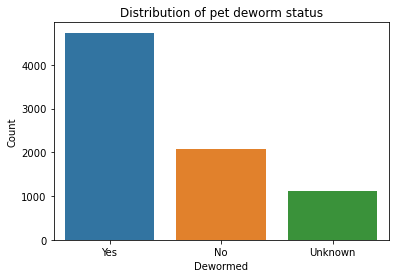

In [49]:
ax = sns.barplot(x = 'Dewormed', y = 'PetID', data=dogData.groupby(['Dewormed']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of pet deworm status')
plt.xlabel('Dewormed')
plt.show()

In [50]:
dogData.Sterilized.value_counts()

2    5107
1    1752
3    1063
Name: Sterilized, dtype: int64

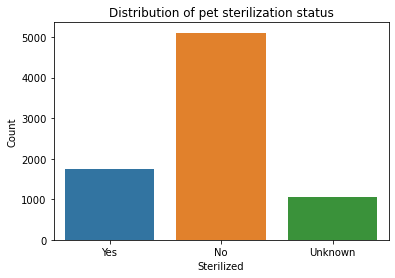

In [51]:
ax = sns.barplot(x = 'Sterilized', y = 'PetID', data=dogData.groupby(['Sterilized']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of pet sterilization status')
plt.xlabel('Sterilized')
plt.show()

In [52]:
dogData.Health.value_counts()

1    7663
2     240
3      19
Name: Health, dtype: int64

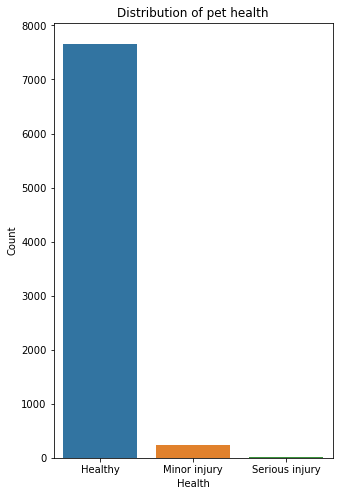

In [53]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Health', y = 'PetID', data=dogData.groupby(['Health']).count().reset_index())
plt.xticks(np.arange(0,3), ['Healthy', 'Minor injury', 'Serious injury'])
plt.ylabel('Count')
plt.title('Distribution of pet health')
plt.xlabel('Health')
plt.show()

In [54]:
dogData.Quantity.value_counts() 

1     6425
2      598
3      257
4      210
5      148
6      117
7       57
8       45
9       30
10       8
20       8
11       7
12       4
17       3
16       2
15       1
14       1
13       1
Name: Quantity, dtype: int64

In [55]:
dogData.Fee.describe()

count    7922.000000
mean       24.248170
std        90.349573
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3000.000000
Name: Fee, dtype: float64

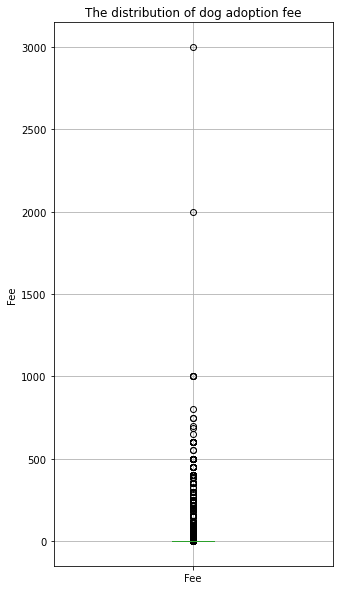

In [56]:
plt.figure(figsize = (5, 10))
dogData[['Fee']].boxplot()
plt.ylabel('Fee')
plt.title('The distribution of dog adoption fee')
plt.show()

In [57]:
z_scores = stats.zscore(dogData.Fee)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dogData = dogData[filtered_entries]

234 records were removed.

In [58]:
dogData.State.value_counts(normalize = True)

41326    0.602627
41401    0.204995
41327    0.076093
41330    0.041493
41336    0.032778
41332    0.017820
41324    0.011056
41325    0.007154
41335    0.004292
41345    0.000520
41367    0.000390
41415    0.000260
41342    0.000260
41361    0.000260
Name: State, dtype: float64

In [59]:
stateCounts = dogData.State.value_counts().to_frame()

Let's only keep the top 7 states and group the rest of the states as others: 0.

In [60]:
top7States = list(stateCounts.index[:7])
dogData.State = np.where((dogData['State'].isin(top7States)), dogData['State'], 0) 

In [61]:
dogData.State.value_counts()

41326    4633
41401    1576
41327     585
41330     319
41336     252
41332     137
0         101
41324      85
Name: State, dtype: int64

In [62]:
enc = preprocessing.OneHotEncoder()
stateEnc = enc.fit_transform(dogData.State.values.reshape(-1, 1)).toarray()
stateOneHot = pd.DataFrame(stateEnc, columns = ["State_"+str(i) for i in sorted(dogData.State.unique()) ])
dogData = pd.concat([dogData, stateOneHot.set_index(dogData['PetID'])], axis=1)
# drop 'State' column
dogData.drop(['State'], axis=1, inplace = True) 
dogData.head()

,Age,Gender,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,NumColor,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,Size_4,State_0,State_41324,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,2,1,1,2,1,1,0,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5842f1ff5,4,2,1,1,1,2,1,1,150,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
850a43f90,1,1,1,2,2,2,1,1,0,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
97aa9eeac,0,2,1,2,2,2,1,6,0,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8b693ca84,2,1,1,2,1,2,1,1,0,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
dogData.VideoAmt.value_counts() 

0    7387
1     214
2      45
3      24
4      10
5       4
8       2
7       1
6       1
Name: VideoAmt, dtype: int64

In [64]:
dogData.PhotoAmt.value_counts() 

1.0     1756
2.0     1384
3.0     1220
5.0      991
4.0      896
6.0      311
7.0      207
0.0      181
8.0      171
9.0      111
10.0      98
11.0      96
13.0      44
14.0      43
12.0      40
15.0      20
16.0      18
20.0      14
21.0      11
24.0      10
18.0      10
30.0      10
17.0       9
19.0       8
23.0       6
28.0       5
22.0       5
26.0       5
29.0       4
25.0       3
27.0       1
Name: PhotoAmt, dtype: int64

In [65]:
dogData.AdoptionSpeed.value_counts() 

4    2283
2    2051
3    1849
1    1348
0     157
Name: AdoptionSpeed, dtype: int64

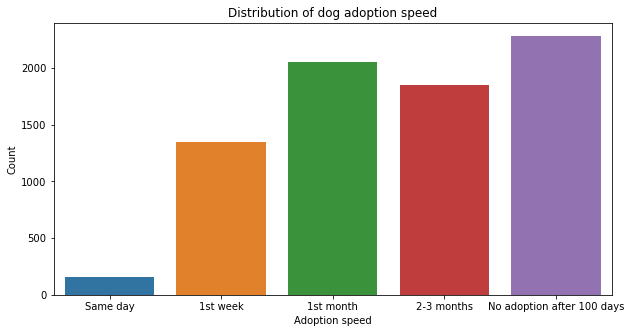

In [66]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=dogData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,5), ['Same day', '1st week', '1st month', '2-3 months', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of dog adoption speed')
plt.xlabel('Adoption speed')
plt.show()

### Cat data analysis

In [67]:
catData.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
6296e909a,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
d24c30b4b,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
1caa6fcdb,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
c06d167ca,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1


In [68]:
catData.Age.describe()

count    6861.000000
mean        7.543361
std        12.771554
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max       212.000000
Name: Age, dtype: float64

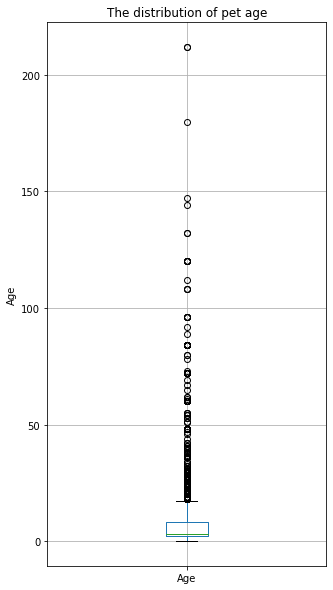

In [69]:
plt.figure(figsize = (5, 10))
catData[['Age']].boxplot()
plt.ylabel('Age')
plt.title('The distribution of pet age')
plt.show()

In [70]:
z_scores = stats.zscore(catData.Age)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
catData = catData[filtered_entries]

168 records were dropped. 

In [71]:
catData['Breed1'].value_counts() 

266    3561
265    1240
299     334
264     287
292     260
       ... 
257       1
218       1
114       1
70        1
0         1
Name: Breed1, Length: 68, dtype: int64

In [72]:
catData[catData['Breed1'] == 0] 

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
27e74e45c,3,0,266,3,1,4,7,1,1,2,1,2,1,3,0,41401,0,Mama cat came to house and gave birth to these...,27e74e45c,11.0,2


In [73]:
#There appears to be some breeds mistakenly filled into Breed2 instead of Breed1, let's fix this.
catData.Breed1 = np.where((catData['Breed1']==0) & (catData['Breed2']!=0), catData['Breed2'], catData['Breed1']) #If breed1 = 0 but not breed2, set breed1 to breed2 and breed2 to 0
catData.Breed2 = np.where((catData['Breed1']== catData['Breed2']), 0, catData['Breed2'])  #If breed1 = breed2, set breed2 to 0

In [74]:
#Create new predictor variable: pureBreed
catData['PureBreed'] = np.where((catData.Breed2 == 0) & (catData.Breed1 != 307), 1, 0)

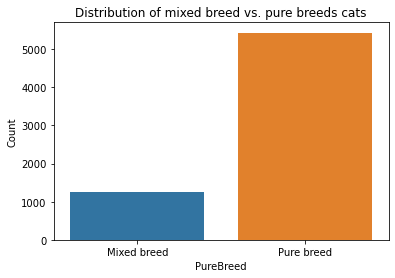

In [75]:
ax = sns.barplot(x = 'PureBreed', y = 'PetID', data=catData.groupby(['PureBreed']).count().reset_index())
plt.xticks(np.arange(0,2), ["Mixed breed", "Pure breed"])
plt.ylabel('Count')
plt.title('Distribution of mixed breed vs. pure breeds cats')
plt.show()

In [76]:
breedCounts = catData.Breed1.value_counts(normalize = True).to_frame()

In [77]:
breedCounts.head(15)

,Breed1
266,0.532198
265,0.185268
299,0.049903
264,0.042881
292,0.038847
285,0.030330
254,0.015389
243,0.013596
283,0.010459
247,0.010309


Let's only keep the top 10 most prominent breeds and group the rest of the breeds as others: 999.

In [78]:
top10Breeds = list(breedCounts.index[:10])
catData.Breed1 = np.where((catData['Breed1'].isin(top10Breeds)), catData['Breed1'], 999) 

In [79]:
catData.Breed1.value_counts()

266    3562
265    1240
999     474
299     334
264     287
292     260
285     203
254     103
243      91
283      70
247      69
Name: Breed1, dtype: int64

In [82]:
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(catData.Breed1.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Breed_"+str(i) for i in sorted(catData.Breed1.unique()) ])
catData = pd.concat([catData, breedOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
catData.drop(['Breed1', 'Breed2'], axis=1, inplace = True) 
catData.head()

,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6296e909a,1,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
d24c30b4b,3,2,5,6,0,2,1,2,2,2,1,1,0,41326,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1caa6fcdb,12,1,1,0,0,2,3,2,2,3,1,1,300,41326,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c06d167ca,2,2,6,0,0,2,2,2,2,2,1,1,0,41326,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
catData.Gender.value_counts()

2    2940
1    2463
3    1290
Name: Gender, dtype: int64

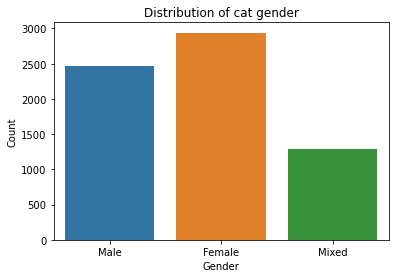

In [84]:
ax = sns.barplot(x = 'Gender', y = 'PetID', data=catData.groupby(['Gender']).count().reset_index())
plt.xticks(np.arange(0,3), ["Male", "Female", "Mixed"])
plt.ylabel('Count')
plt.title('Distribution of cat gender')
plt.show()

In [85]:
catData.Color1.value_counts(dropna = False)

1    3413
2    1056
3     591
6     566
4     476
5     297
7     294
Name: Color1, dtype: int64

In [86]:
catData.Color2.value_counts()

7    1846
0    1436
2     948
6     919
4     649
5     487
3     408
Name: Color2, dtype: int64

In [87]:
catData.Color3.value_counts()

0    4087
7    1937
6     320
5     150
4     117
3      82
Name: Color3, dtype: int64

In [88]:
#Reshape color data to be in the format for generating a histogram
colorData = pd.melt(catData, id_vars = 'PetID', value_vars = ['Color1', 'Color2', 'Color3'], var_name = 'ColorNumber', value_name = 'ColorID')

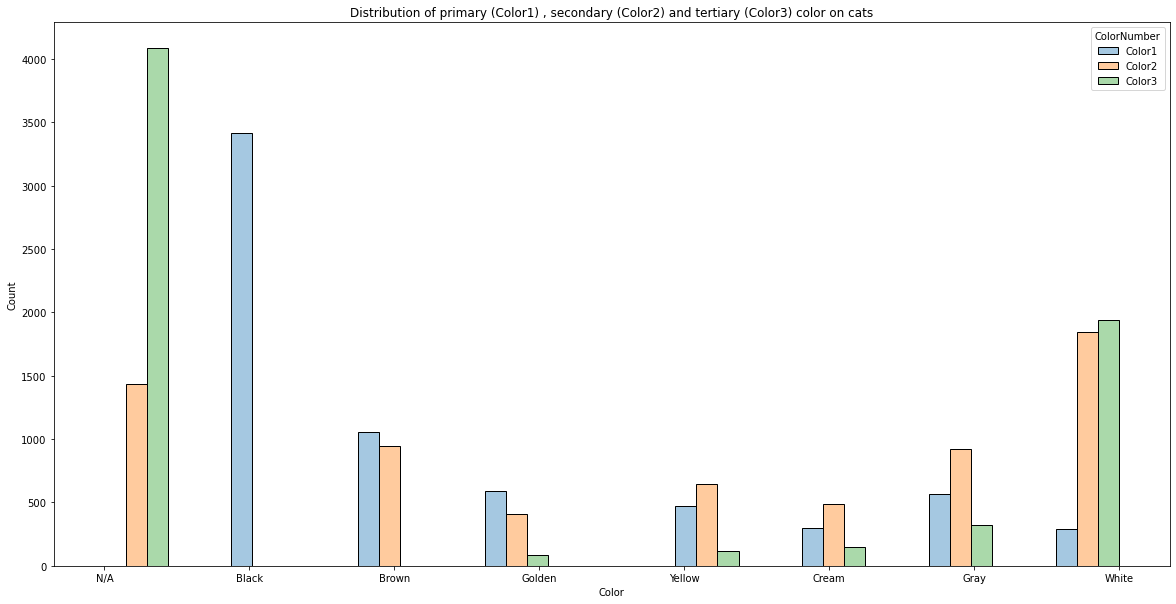

In [89]:
plt.figure(figsize = (20,10))
sns.histplot(data = colorData, x = 'ColorID', hue = 'ColorNumber', stat= 'count', alpha = 0.4, multiple = 'dodge')
plt.xticks(np.arange(0,8), ['N/A', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.xlabel('Color')
plt.title('Distribution of primary (Color1) , secondary (Color2) and tertiary (Color3) color on cats')
plt.show()

In [91]:
#Create new predictor: NumColor (1: 1 color, 2: 2 colors, 3: 3+ colors)

catData['NumColor'] = np.where((catData.Color3 != 0), 3, 2) #Identify pets with 3+ colors, label everything else as '2'
catData['NumColor'] = np.where((catData.Color2 == 0) & (catData.NumColor == 2), 1, catData.NumColor) #Update 2's to 1 if appropriate

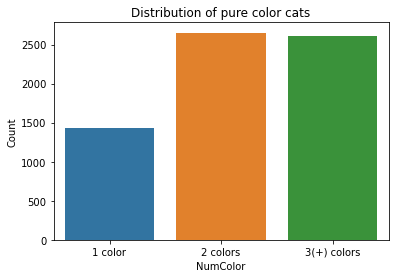

In [92]:
ax = sns.barplot(x = 'NumColor', y = 'PetID', data=catData.groupby(['NumColor']).count().reset_index())
plt.xticks(np.arange(0,3), ["1 color", "2 colors", "3(+) colors"])
plt.ylabel('Count')
plt.title('Distribution of pure color cats')
plt.show()

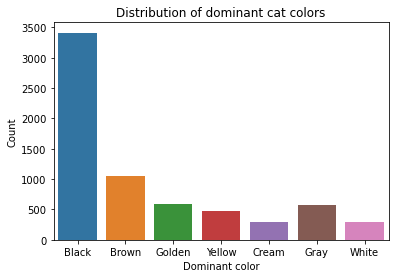

In [93]:
ax = sns.barplot(x = 'Color1', y = 'PetID', data=catData.groupby(['Color1']).count().reset_index())
plt.xticks(np.arange(0,7), ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.ylabel('Count')
plt.xlabel('Dominant color')
plt.title('Distribution of dominant cat colors')
plt.show()

In [94]:
#One hot encode the dominant color (Color1) 
enc = preprocessing.OneHotEncoder()
colorEnc = enc.fit_transform(catData.Color1.values.reshape(-1, 1)).toarray()
colorOneHot = pd.DataFrame(colorEnc, columns = ["Color_"+str(i) for i in sorted(catData.Color1.unique()) ])
catData = pd.concat([catData, colorOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'Color1', 'Color2' & 'Color3' columns 
catData.drop(['Color1', 'Color2', 'Color3'], axis=1, inplace = True) 
catData.head()

,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,NumColor,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,1,1,2,2,2,1,1,100,41326,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6296e909a,1,1,2,2,3,3,3,1,1,0,41401,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
d24c30b4b,3,2,2,1,2,2,2,1,1,0,41326,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1caa6fcdb,12,1,2,3,2,2,3,1,1,300,41326,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
c06d167ca,2,2,2,2,2,2,2,1,1,0,41326,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
catData.MaturitySize.value_counts()

2    4075
1    2160
3     449
4       9
Name: MaturitySize, dtype: int64

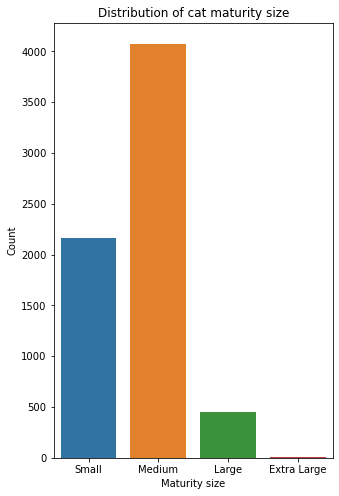

In [96]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'MaturitySize', y = 'PetID', data=catData.groupby(['MaturitySize']).count().reset_index())
plt.xticks(np.arange(0,4), ['Small', 'Medium', 'Large', 'Extra Large'])
plt.ylabel('Count')
plt.title('Distribution of cat maturity size')
plt.xlabel('Maturity size')
plt.show()

In [97]:
# One hot encode maturity size
enc = preprocessing.OneHotEncoder()
sizeEnc = enc.fit_transform(catData.MaturitySize.values.reshape(-1, 1)).toarray()
sizeOneHot = pd.DataFrame(sizeEnc, columns = ["Size_"+str(i) for i in sorted(catData.MaturitySize.unique()) ])
catData = pd.concat([catData, sizeOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'MaturitySize' column
catData.drop(['MaturitySize'], axis=1, inplace = True) 
catData.head()

,Age,Gender,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,NumColor,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,Size_4
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,1,2,2,2,1,1,100,41326,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6296e909a,1,1,2,3,3,3,1,1,0,41401,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
d24c30b4b,3,2,1,2,2,2,1,1,0,41326,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1caa6fcdb,12,1,3,2,2,3,1,1,300,41326,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
c06d167ca,2,2,2,2,2,2,1,1,0,41326,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [98]:
catData.FurLength.value_counts()

1    3998
2    2281
3     414
Name: FurLength, dtype: int64

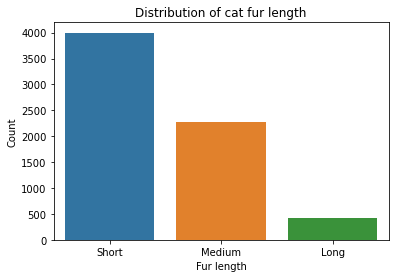

In [99]:
ax = sns.barplot(x = 'FurLength', y = 'PetID', data=catData.groupby(['FurLength']).count().reset_index())
plt.xticks(np.arange(0,3), ['Short', 'Medium', 'Long'])
plt.ylabel('Count')
plt.title('Distribution of cat fur length')
plt.xlabel('Fur length')
plt.show()

In [100]:
catData.Vaccinated.value_counts()

2    4193
1    1855
3     645
Name: Vaccinated, dtype: int64

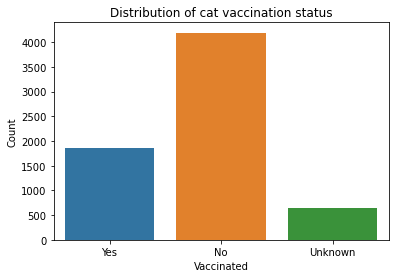

In [101]:
ax = sns.barplot(x = 'Vaccinated', y = 'PetID', data=catData.groupby(['Vaccinated']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of cat vaccination status')
plt.xlabel('Vaccinated')
plt.show()

In [102]:
catData.Dewormed.value_counts()

1    3376
2    2720
3     597
Name: Dewormed, dtype: int64

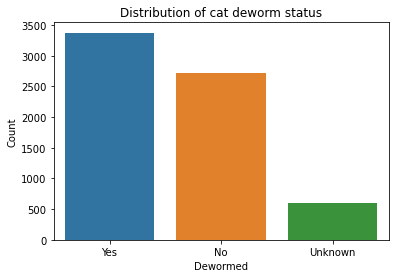

In [103]:
ax = sns.barplot(x = 'Dewormed', y = 'PetID', data=catData.groupby(['Dewormed']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of cat deworm status')
plt.xlabel('Dewormed')
plt.show()

In [104]:
catData.Sterilized.value_counts()

2    4885
1    1124
3     684
Name: Sterilized, dtype: int64

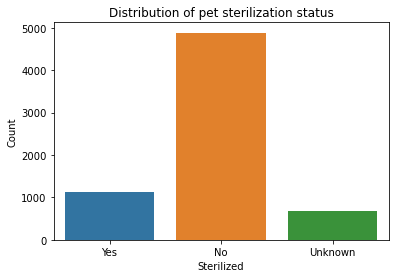

In [105]:
ax = sns.barplot(x = 'Sterilized', y = 'PetID', data=catData.groupby(['Sterilized']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of pet sterilization status')
plt.xlabel('Sterilized')
plt.show()

In [106]:
catData.Health.value_counts()

1    6473
2     209
3      11
Name: Health, dtype: int64

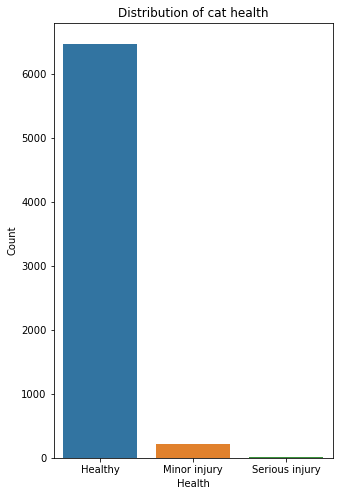

In [107]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Health', y = 'PetID', data=catData.groupby(['Health']).count().reset_index())
plt.xticks(np.arange(0,3), ['Healthy', 'Minor injury', 'Serious injury'])
plt.ylabel('Count')
plt.title('Distribution of cat health')
plt.xlabel('Health')
plt.show()

In [108]:
catData.Quantity.value_counts() 

1     4811
2      788
3      460
4      320
5      184
6       67
7       27
10      11
8        7
20       3
15       3
9        3
11       3
12       2
14       1
16       1
18       1
13       1
Name: Quantity, dtype: int64

In [109]:
catData.Fee.describe()

count    6693.000000
mean       17.550725
std        61.434012
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Fee, dtype: float64

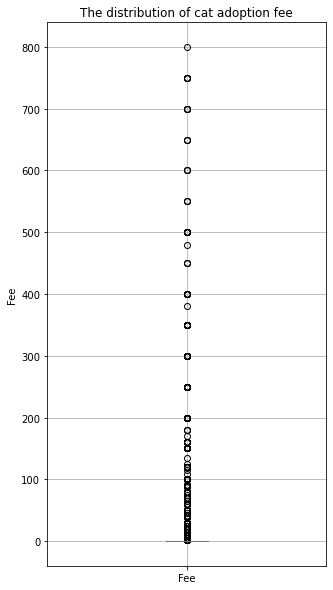

In [111]:
plt.figure(figsize = (5, 10))
catData[['Fee']].boxplot()
plt.ylabel('Fee')
plt.title('The distribution of cat adoption fee')
plt.show()

In [113]:
z_scores = stats.zscore(catData.Fee)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
catData = catData[filtered_entries]

109 records were dropped.

In [115]:
catData.State.value_counts(normalize = True)

41326    0.555286
41401    0.315765
41336    0.033718
41327    0.032959
41332    0.016859
41330    0.013214
41325    0.008050
41335    0.007746
41324    0.007139
41361    0.003190
41345    0.002582
41367    0.001823
41342    0.001519
41415    0.000152
Name: State, dtype: float64

In [116]:
stateCounts = catData.State.value_counts().to_frame()

Let's only keep the top 6 states and group the rest of the states as others: 0.

In [119]:
top6States = list(stateCounts.index[:6])
catData.State = np.where((catData['State'].isin(top6States)), catData['State'], 0) 

In [120]:
catData.State.value_counts()

41326    3656
41401    2079
41336     222
41327     217
0         212
41332     111
41330      87
Name: State, dtype: int64

In [121]:
enc = preprocessing.OneHotEncoder()
stateEnc = enc.fit_transform(catData.State.values.reshape(-1, 1)).toarray()
stateOneHot = pd.DataFrame(stateEnc, columns = ["State_"+str(i) for i in sorted(catData.State.unique()) ])
catData = pd.concat([catData, stateOneHot.set_index(catData['PetID'])], axis=1)
# drop 'State' column
catData.drop(['State'], axis=1, inplace = True) 
catData.head()

,Age,Gender,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,PureBreed,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,NumColor,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,Size_4,State_0,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,1,2,2,2,1,1,100,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6296e909a,1,1,2,3,3,3,1,1,0,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
d24c30b4b,3,2,1,2,2,2,1,1,0,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
c06d167ca,2,2,2,2,2,2,1,1,0,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7a0942d61,12,2,2,3,3,3,1,1,0,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [122]:
catData.VideoAmt.value_counts() 

0    6329
1     189
2      46
3       9
4       5
6       3
5       3
Name: VideoAmt, dtype: int64

In [123]:
catData.PhotoAmt.value_counts() 

3.0     1170
1.0     1144
5.0     1060
2.0     1003
4.0      898
6.0      288
7.0      212
0.0      143
8.0      133
9.0      108
10.0      81
11.0      80
12.0      57
13.0      39
14.0      30
15.0      29
16.0      19
17.0      17
19.0      11
20.0      10
18.0       8
30.0       8
23.0       6
26.0       5
25.0       5
24.0       4
22.0       4
21.0       4
27.0       4
28.0       2
29.0       2
Name: PhotoAmt, dtype: int64

In [124]:
catData.AdoptionSpeed.value_counts() 

2    1793
4    1691
1    1611
3    1254
0     235
Name: AdoptionSpeed, dtype: int64

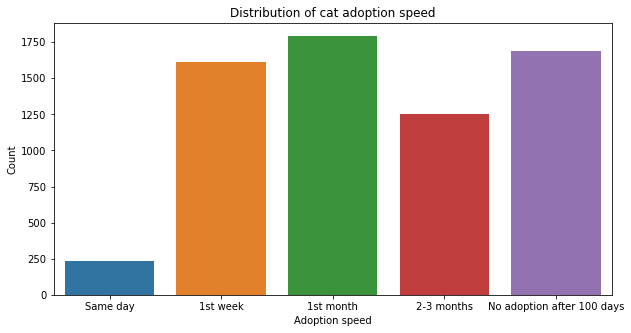

In [125]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=catData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,5), ['Same day', '1st week', '1st month', '2-3 months', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of cat adoption speed')
plt.xlabel('Adoption speed')
plt.show()

In [ ]:
sns.pairplot(data)